### A pair of related problems:

1. Given a function rand5() that generates a random integer between 1 and 5 with uniform distribution, use it to write a rand7() function.   
2. Vice versa: Given rand7(), write rand5()

Lets do 2 first. There are probably several ways of doing this. Immediate thought is to for each nummber, call rand7() 5 times and then integer divide by 5.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def rand7_given():
    return np.random.randint(low=1,high=8)

In [63]:
def rand5():
    """rejection sampling - easy"""
    
    while True:
        candidate = rand7_given()
        if candidate <=5:
            return candidate
        
def rand5():
    """rejection sampling - attempt to speed up using pattern"""
    
    while True:
    
        c1 = rand7_given()
        c2 = rand7_given()
    
        #Generate numbers from 1 to 49 like this, due to rejection sampling
        #Recall this rule - row * (col-1)*n will generate random numbers from 1 to max(c1)*max(c2)
        idx = c1 + (c2 - 1)*7
        
        if idx <= 45:
            return 1 + (idx - 1) % 5
        
        c1 = idx - 45
        c2 = rand7_given()
            
        #Generate numbers from 1 to (4*7) = 28 like this, due to rejection sampling
        idx = c1 + (c2 - 1)*7
        if idx <= 25:
            return 1 + (idx - 1)%5
        
        c1 = idx - 25
        c2 = rand7_given()
        
        #Generate numbers from 1 to (3*7) = 21 like this, due to rejection sampling
        idx = c1 + (c2 - 1)*7
        
        if idx <= 20:
            return 1 + (idx - 1)%5
        
        #We have 21 in this case, which is rare
        
            
def test_dist(func_in,n_tests,bins=5):
    
    op = []
    for i in range(n_tests):
        op.append(func_in())
    
    plt.hist(op,bins=bins)

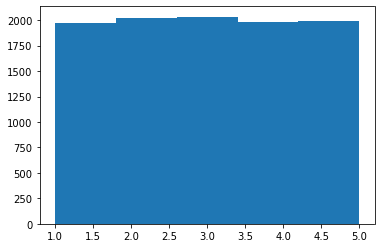

In [48]:
test_dist(rand5,10000,bins=5)

Lets now do rand7() using rand5(). This will be the same sort of concept, only this time the obvious solutioin using simple rejection sampling won't work because we need to generate more than 5 numbers originally

In [86]:
def rand5_given():
    return np.random.randint(low=1,high=6)


def rand7():
    
    while True:
        c1 = rand5_given()
        c2 = rand5_given()
    
        #This will give us all numbers from 1 to 25
        #we know that 21 is the nearest multiple of 7, so if idx <=21, we can 
        #compute the closest multiple of 7 and get a uniform distribution
        idx = c1 + (c2 - 1)*5
    
        if idx <= 21:
            #Why this? because the remainder of a multiple of 7-1 will be at most 6 and at least 0,
            #so we need to add these on
            return 1 + (idx-1)%7
                

It may be possible to use the generated numbers from 22-25 to reduce the number of times this has to reject and re-evaluate itself

CPU times: user 17.1 s, sys: 37.1 ms, total: 17.1 s
Wall time: 17.2 s


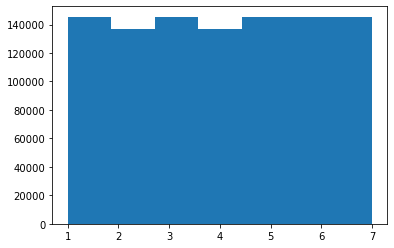

In [85]:
%%time
test_dist(rand7,1000000,bins=7)